# Simulation Setup

Fix a compact and convex $d$-dimensional domain $W \subset \mathbb{R}^d$ and suppose the data set $\mathcal{D}_n := \{(X_1, Y_1), \ldots, (X_n,Y_n)\}$ consists of $n$ i.i.d. samples from a random pair $(X,Y) \in W \times \mathbb{R}$ such that $\mathbb{E}[Y^2] < \infty$.  Let $\mu$ denote the unknown distribution of $X$ and assume
$$Y = f(X) + \varepsilon,$$
for some unknown function $f: \mathbb{R}^d \to \mathbb{R}$ and $\varepsilon$ is noise such that $\mathbb{E}[\varepsilon|X] = 0$ and $\mathrm{Var}(\varepsilon|X) = \sigma^2 < \infty$ almost surely. 

We make the additional assumption on the function $f$, that it is of the form
$$f(x) = g(Ax), \quad x \in \mathbb{R}^d,$$
where $g:\mathbb{R}^s \to \mathbb{R}$ and $A \in \mathbb{R}^{s \times d}$ for $s \leq d$. This is a general dimensionality reduction model often referred to as a \emph{multi-index model} or \emph{ridge function}, where the regression function depends only on the inputs $\langle a_1, X \rangle, \ldots, \langle a_s, X \rangle$, where $\{a_i\}_{i=1}^s$ are the rows of $A$. Let $S := \mathrm{span}(\{a_i\}_{i=1}^s)$ denote the associated \emph{relevant feature subspace}. An equivalent assumption is that
$$f(x) = \tilde{g}(P_S x),$$
where $P_S$ is the orthogonal projection onto $S$.

In this notebook, we will simulate the effectiveness of our proposed method with the following parameters:

- Total dimension: $d = 5$
- Active dimension: $s = 2$
- Number of Mondrian trees: $M = 10$
- Lifetime of Mondrian tree: $\lambda = 5$
- Step size used for finite difference method: $t = 0.1$
- Number of training samples: $n = 200, 400, 800, 1600$
- Number of test samples: $m = 1600$
- Each $X_i \sim U[-1,1]^d$
- The noise: $\varepsilon \sim \mathcal(0, \sigma^2 = 0.01)$

and compare the performance of TrIM with the Weighted Mondrian.

In [1]:
from utils import *

dim_in = 5
active = 2
tries = 1
lifetime = 5
step_size = 0.2 # in the implementation, this will be divided by 2
n_estimators = 10
sample_range = [200, 400, 800, 1600]

np.random.seed(0)
x_train = np.random.rand(1600, dim_in) * 2 - 1
x_test = np.random.rand(1600, dim_in) * 2 - 1

# First Scenario

In this scenario, we do not apply any rotation to the data, and set $$g(x) = x_1^4 + x_2^4$$

In [2]:
fn = SimulatedData(dim_in, active, fun="poly")

# In our implementation, we actually transform the data by first computing x @ fn.rotation and the projecting to the first two coordinates
fn.rotation

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [3]:
y_train = vmap(fn.fun, in_axes=0, out_axes=0)(x_train)
y_test = vmap(fn.fun, in_axes=0, out_axes=0)(x_test)

true_H = fn.get_true_H(x_test)
true_H/two_one_norm(true_H)

Array([[ 2.503654  , -0.01703851,  0.        ,  0.        ,  0.        ],
       [-0.01703851,  2.4962296 ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]],      dtype=float32)

In [4]:
simulation = SimulationAligned(dim_in, active, n_estimators, tries, lifetime, step_size, sample_range, x_train, x_test, y_train, y_test, true_H)

  0%|          | 0/4 [00:00<?, ?it/s]

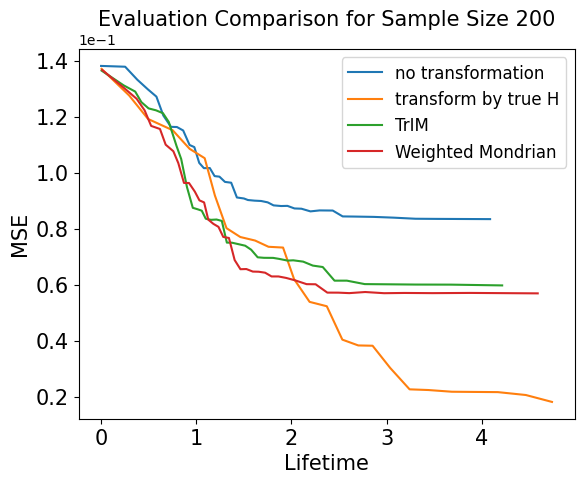

 25%|██▌       | 1/4 [00:02<00:08,  2.91s/it]

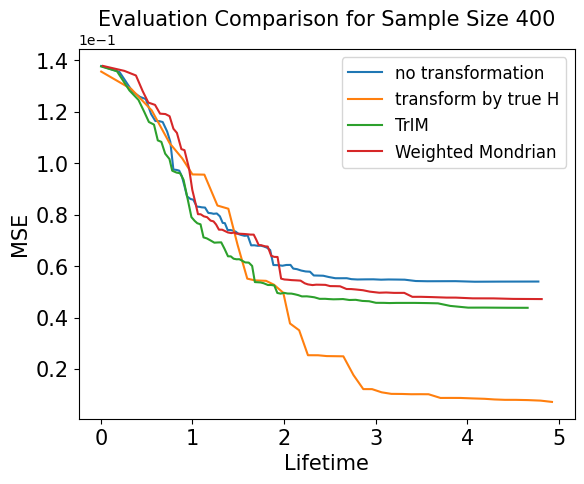

 50%|█████     | 2/4 [00:08<00:09,  4.71s/it]

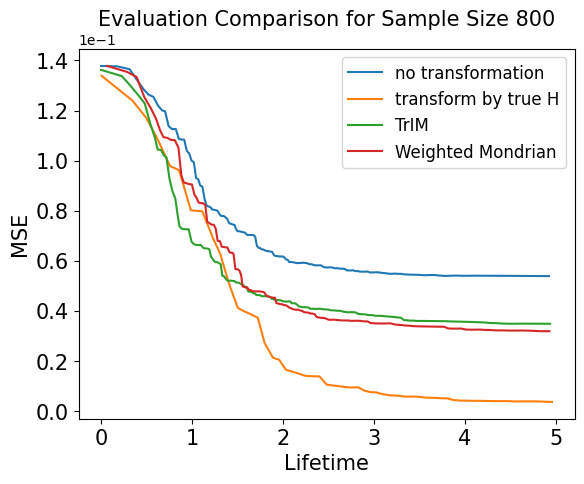

 75%|███████▌  | 3/4 [00:22<00:08,  8.58s/it]

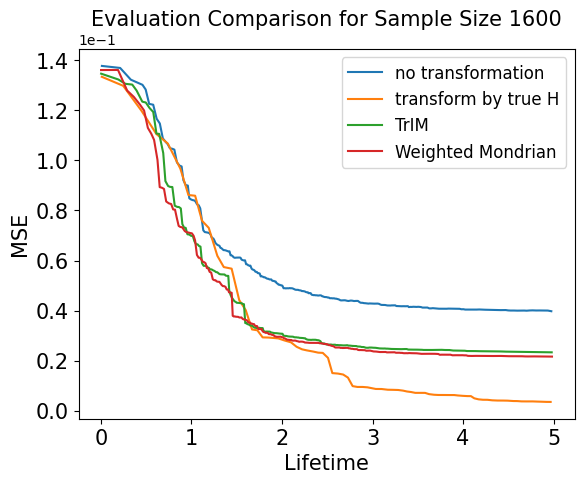

100%|██████████| 4/4 [00:59<00:00, 14.97s/it]


In [5]:
simulation.evaluation_comparison(save_path = "simulation/aligned_scenario_1")

# Second Scenario

In this scenario, we have set $$g(x) = \exp(-0.25 * \min(x_1^2, x_2^2)).$$

In [6]:
fn = SimulatedData(dim_in, active, rotation=None, fun="max")

fn.rotation

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
y_train = vmap(fn.fun, in_axes=0, out_axes=0)(x_train)
y_test = vmap(fn.fun, in_axes=0, out_axes=0)(x_test)

true_H = fn.get_true_H(x_test)
true_H/two_one_norm(true_H)

Array([[2.4318073, 0.       , 0.       , 0.       , 0.       ],
       [0.       , 2.568193 , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       ]],      dtype=float32)

In [8]:
simulation = SimulationAligned(dim_in, active, n_estimators, tries, lifetime, step_size, sample_range, x_train, x_test, y_train, y_test, true_H)

  0%|          | 0/4 [00:00<?, ?it/s]

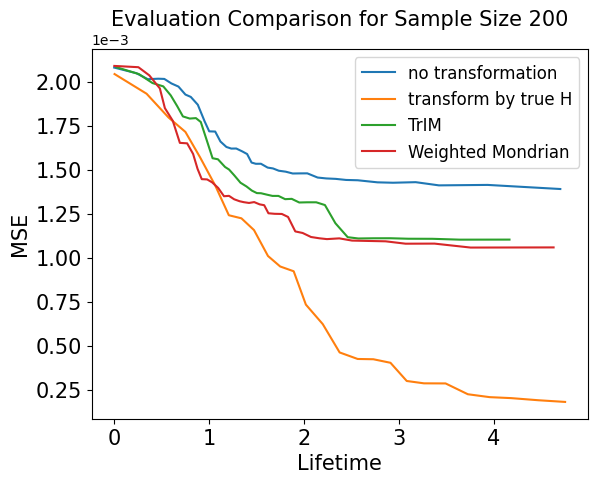

 25%|██▌       | 1/4 [00:02<00:08,  2.93s/it]

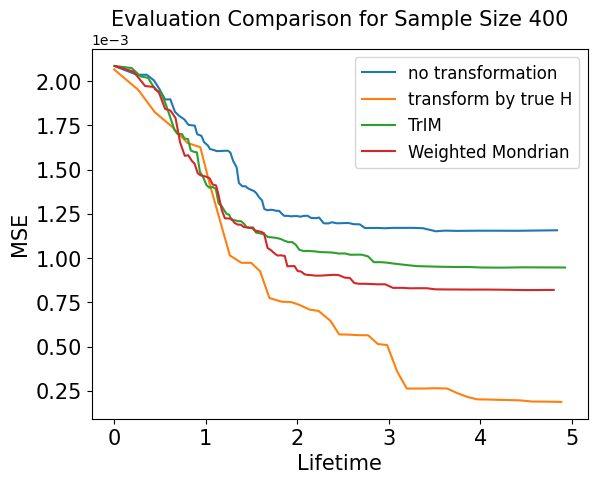

 50%|█████     | 2/4 [00:08<00:09,  4.63s/it]

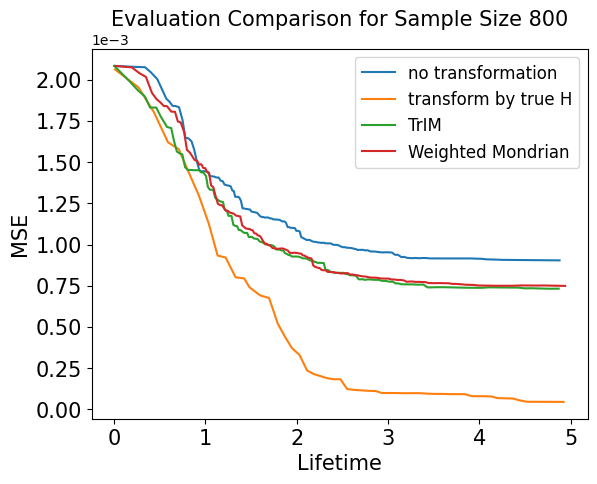

 75%|███████▌  | 3/4 [00:22<00:08,  8.97s/it]

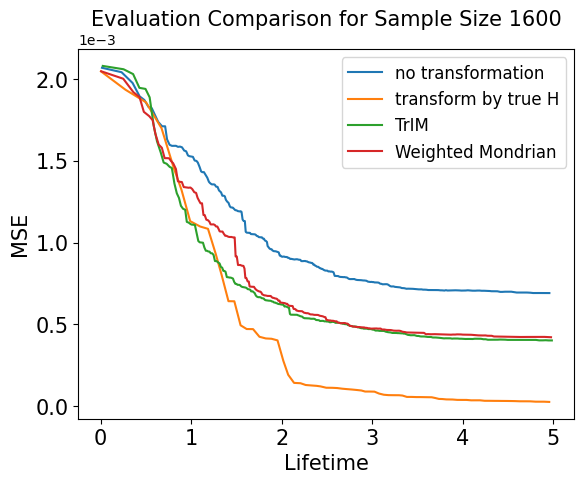

100%|██████████| 4/4 [01:04<00:00, 16.14s/it]


In [9]:
simulation.evaluation_comparison("simulation/aligned_scenario_2")